## 爬取ptt電影版10月以來的文章標題，製作文字雲 ##
* 以bs4爬取
* 以jieba斷詞
* 以wordcloud繪製文字雲

In [1]:
import requests
import bs4
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
import matplotlib.colors as colors

In [2]:
#爬取得ptt電影版文章標題，及回傳下一頁網址
def getData(url):
    response = requests.get(url)
    #print(response.text)

    root = bs4.BeautifulSoup(response.text, 'html.parser')
    titles = root.find_all('div', class_ = 'title')

    with open('ptt_movie_title.txt', 'a', encoding='utf-8') as file:
        for title in titles:
            if title.a != None:
                file.write(title.a.string + '\n')

    nextpage = root.find('a', string='‹ 上頁')
    return 'https://www.ptt.cc' + nextpage['href']       

In [3]:
#設定網址及爬幾頁
url = 'https://www.ptt.cc/bbs/movie/index.html'
pages = 39
count = 0
while count < pages:
    url = getData(url)
    count+=1

In [4]:
#讀取檔案中的文字，放進文字變數
titles_words = ''
with open('ptt_movie_title.txt', 'r', encoding='utf-8') as file:
    for line in iter(file):
        titles_words += line

In [5]:
titles_words

'[情報] 2021 新加坡奧斯卡代表：《熱帶雨》\n[贈票] 高雄 工作細菌一張\n[好雷]神棄之地－－一個個悲傷的故事 \n[新聞] 【紫羅蘭永恆花園電影版】全台賣破2000萬\n[討論] 范植偉是不是生錯時代?\n[片單] 看完心情會很差的同志片\n[新聞] 性愛片《感官世界》真槍實彈遭打壓\u3000一刀\n[好雷] 星際效應\n[  雷] 星際效應的無人機\n[公告] 板規 2020/03/01 (增加14.1)\n[公告] 關於跑步哥\n[情報] 近期院線預計重映片單\n[公告][板規] 電影版申訴與檢舉辦法\n[公告] 電影板板規12/08/2020\n[情報] 2021 新加坡奧斯卡代表：《熱帶雨》\n[贈票] 高雄 工作細菌一張\n[好雷]神棄之地－－一個個悲傷的故事 \n[新聞] 【紫羅蘭永恆花園電影版】全台賣破2000萬\n[討論] 范植偉是不是生錯時代?\n[片單] 看完心情會很差的同志片\n[新聞] 性愛片《感官世界》真槍實彈遭打壓\u3000一刀\n[好雷] 星際效應\n[  雷] 星際效應的無人機\n[公告] 板規 2020/03/01 (增加14.1)\n[公告] 關於跑步哥\n[情報] 近期院線預計重映片單\n[公告][板規] 電影版申訴與檢舉辦法\n[公告] 電影板板規12/08/2020\n[好雷] 威秀二刷星際效應\n[好雷] 千年一問\n[  雷] 當你熟睡 \n[微負雷] 壞種 - 只是欠一個聰明的大人教訓而已\n[影評] 《無聲》: 擲地有聲、入圍金馬8項社會寫實\n[新聞] 陳亭妃關心豐盛之城進度（魏德聖台灣三部曲）\n[新聞] 《刻在你心底》連假搶客票房破5300萬\n[負雷] 刻在你心底的名字 ...真的有刻進去嗎？ \n[片單] 請推薦Giloo網站的影片 新註冊可看14天\n[情報] 「如果你給我的，跟你給別人的」出自三毛?\nRe: [討論] 消失的情人節 票房 1300 萬\n[討論] 鬼滅之刃上映後有機會超過刻你名票房嗎？\n[好雷] 愛情列車長 Kolej na milosc\n[討論] 蜘蛛人三代同堂?\n[問片] 狗的冒險電影 應該在2007以前\n[  雷] 星際效應\n[新聞] 電玩中開演唱會已不稀奇 《藥頭大媽》伊\n[贈票] 《獅子山上》特映搶先看\n[新聞] 《黑豹2》傳仿造《星戰9》的莉

In [6]:
#使用jieba斷詞
#自定詞庫及停用詞庫
jieba.set_dictionary('dict.txt.big.txt')
jieba.load_userdict('movie_user_dict_.txt')
with open('stopWord_movie.txt', 'r', encoding='utf-8-sig') as file:
    stops = file.read().split('\n')   
terms = []  #儲存字詞
for word in jieba.cut(titles_words, cut_all=False):
    if word not in stops:
        terms.append(word)
words_dict = Counter(terms)

Building prefix dict from C:\Users\ching\notbooks\NLP_jieba_news\dict.txt.big.txt ...
Loading model from cache C:\Users\ching\AppData\Local\Temp\jieba.u085729b01356fdf6c9eb27efd58d0149.cache
Loading model cost 1.085 seconds.
Prefix dict has been built succesfully.


In [7]:
words_dict
print(sorted(words_dict.items(), key=lambda x:x[1], reverse=True ))

[(' ', 5983), ('\n', 3464), ('刻在你心底的名字', 595), ('魏德聖', 159), ('票房', 102), ('天能', 98), ('星際效應', 95), ('消失的情人節', 91), ('有雷', 87), ('刻在', 80), ('贈票', 76), ('入圍', 69), ('金馬', 64), ('倒數', 61), ('紫羅蘭', 57), ('永恆', 56), ('經典', 54), ('上映', 53), ('花園', 51), ('新作', 51), ('2020', 45), ('韓國', 43), ('國片', 43), ('台灣', 43), ('金馬獎', 42), ('質疑', 40), ('重映', 39), ('觀後感', 39), ('預告', 37), ('福爾摩斯', 36), ('愛情', 34), ('蜘蛛人', 33), ('日本', 33), ('劇情', 33), ('奧斯卡', 32), ('\u3000', 32), ('疑問', 32), ('少女', 32), ('Netflix', 31), ('導演', 31), ('諾蘭', 31), ('價值觀', 30), ('2021', 29), ('無聲', 29), ('寄生上流', 29), ('可以', 28), ('劇組', 28), ('電影版', 27), ('同志', 27), ('演員', 27), ('二刷', 26), ('花木蘭', 26), ('不知所云', 25), ('名單', 25), ('法國', 24), ('卡維爾', 24), ('家族', 24), ('提告', 24), ('名字', 24), ('反派', 23), ('小說', 23), ('狂人', 23), ('冠軍', 22), ('最強', 22), ('恐龍', 22), ('解藥', 22), ('最新', 22), ('進度', 21), ('搶先', 21), ('新片', 21), ('場景', 21), ('復仇者', 21), ('拍電影', 21), ('影展', 21), ('延期', 21), ('大獎', 21), ('刻在你心底', 20), ('一問', 20), ('主演', 20),

In [10]:
#用wordcloud和PIL來產生
#男性與機車圖
font = r'msyh.ttc'
mask = np.array(Image.open('man_2_small.png'))
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090','#778899','#556B2F'])
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090','#778899'])
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090'])
colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080'])
pttmoviecloud = WordCloud(background_color='white', colormap=colormaps, mask=mask, font_path=font)
pttmoviecloud.generate_from_frequencies(frequencies=words_dict)

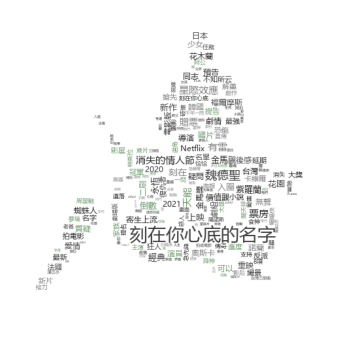

In [11]:
#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(pttmoviecloud)
plt.axis("off")
plt.show()

In [12]:
pttmoviecloud.to_file("ppt_movie_title_Wordcloud8.png")  #存檔

In [13]:
#用wordcloud和PIL來產生
#葉子圖
font = r'msyh.ttc'
mask = np.array(Image.open('leaf_2_small.png'))
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090','#778899','#556B2F'])
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090','#778899'])
#colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080','#708090'])
colormaps = colors.ListedColormap(['#1E1E1E','#2B2B2B','#404040','#6969','#808080'])
pttmoviecloud = WordCloud(background_color='white', colormap=colormaps, mask=mask, font_path=font)
pttmoviecloud.generate_from_frequencies(frequencies=words_dict)

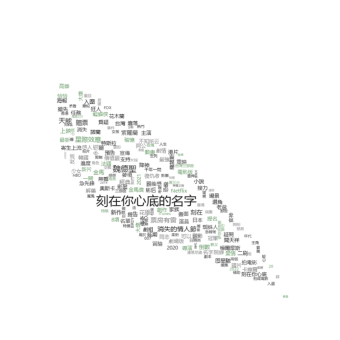

In [14]:
#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(pttmoviecloud)
plt.axis("off")
plt.show()

In [15]:
pttmoviecloud.to_file("ppt_movie_title_Wordcloud9.png")  #存檔